# Welcome to the Dark Art of Coding:
## Introduction to Machine Learning
Intro to Scoring and Validation

<img src='../universal_images/dark_art_logo.600px.png' width='300' style="float:right">

# Objectives
---

In this session, students should expect to:

* Explore principles of machine learning scoring and validation
   * Holdout-sets, cross-validation sets, data leakage/test set leakage
   * Model selection, model improvement approaches
   * Bias and variance trade-offs
   * Validation curves

* Things we will NOT be covering today***:
   * Learning curves
   * Grid search
   * Gotchas

# Hackathon Announcement
---

Booz Allen is hosting a Hackathon!

**Theme**: Open Source Solutions for Climate Change

**Technical requirements**: You are free to leverage any technologies, frameworks, methodologies, etc., but all solutions produced must be able to be open sourced under the MIT License. To help kickstart your creative juices, we will be providing a number of rich datasets a few weeks before the event (NOTE: their usage is NOT required in your solution)

* Saturday, March 7th, 2020
* Doors will open for check-in starting at 8:00am
* Event officially kicks off at 9:00am and ends at 9:00pm
* Free food throughout the day

https://bit.ly/2FrXgXc

# Workshop Announcement
---

Full-blown, hands-on workshop focused on exploring today's topic in greater depth and with code you can tweak and experiment with.

http://bit.ly/202003_val_workshop

* March 21, 2020
* Starts at 9:00 am
* Goes for about 3.5 hours
* We'll feed you!
* I'll try to educate and entertain you

Plenty of chances for you to dive into the code and manipulate it yourself so that you can get a better understanding of what is happening under the hood.

Content?

We will cover the material you see here today in greater depth AND we will dive into:
   * Learning curves
   * Grid search
   * Gotchas


# Why do we need to validate our machine learning models?
---

The simple answer is to determine whether we are getting valid and meaningful results.

One might ask: aren't the main models in libraries like **scikit-learn**, etc:

* robust
* designed to use sane defaults? 
* shouldn't they just work?

While this is true, as we will see, there a number of factors that can completely derail our success even with world class libraries. Including, but not limited to:

* failure to divide your data into training, test and validation sets can lead to erroneous results
* selection of models that are too complicated/not complicated enough can impact the validity of the results
* having too few samples OR having too few features per sample can also limit your success

Some of these will impact the **bias** and **variance** of your models. Don't worry if you don't know what that means, we'll explore both of those topics.

As part of that conversation, we will explore the use of validation curves to better understand how our model performs under different conditions or with minor modifications.

# So, about that data
---

While we know that we often get data that is messy and needs work, we are gonna gloss over those aspects of data wrangling and data and feature engineering as a talk for another day. We will presume that our data has been cleaned, normalized and transformed into neat and orderly features.

What we will NOT gloss over are several factors that might impact our ability to use the data to both train our model and then test our model. Such factors include:

* inadequate amounts of data to break into training and test data
* data that sorted OR clustered OR ordered in some way


# Holdout-sets, cross-validation sets, test set leakage
---

Let's start by looking at a couple of simple examples of how we might **inadequately** break up our data into training sets and test sets:

For reference, some loose definitions of a training set versus test sets are:

* **training set**: data that is used to fit the parameters (e.g., weights) of a formula OR model.

* **test set**: data that should be independent of the training data set, but should have a similar probability distribution as the training data. The test set is used to assess the performance of the specified formula OR model.
 

This data is from the **seeds data set** hosted by University of California, Irvine.

**References**:

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 

Specifically, this data set: https://archive.ics.uci.edu/ml/datasets/seeds

### Setup code

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

### Data sets

In [2]:
df = pd.read_csv('../universal_datasets/seeds_dataset.txt',
                 sep='\s+',
                 names=['area', 
                        'perimeter', 
                        'compactness', 
                        'length', 
                        'width', 
                        'asymmetry_coeff', 
                        'length_of_kernel_groove', 
                        'category'])

Some notes about the data. There appears to be a relationship between the compactness and the Area and the Perimeter. We might wanna explore that later.
    
1. area (A)
2. perimeter (P)
3. compactness (C = $4 \pi A/P^2$) 
4. length of kernel
5. width of kernel
6. asymmetry coefficient
7. length of kernel groove
8. category < One of three types of seed.

In [3]:
df

,area,perimeter,compactness,length,width,asymmetry_coeff,length_of_kernel_groove,category
0,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.6990,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.2590,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.4620,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.5860,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.7000,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.9690,5.533,1


For this first experiment, let's just focus on three columns worth of data:

* area
* perimeter
* compactness

In [4]:
X = df[['area', 'perimeter', 'compactness']]
y = df['category']

Let's look at `X`:

In [5]:
X.shape

(210, 3)

In [6]:
X[:5]

,area,perimeter,compactness
0,15.26,14.84,0.8710
1,14.88,14.57,0.8811
2,14.29,14.09,0.9050
3,13.84,13.94,0.8955
4,16.14,14.99,0.9034


Let's look at `y`:

In [7]:
y.shape

(210,)

In [8]:
y[:5]         

0    1
1    1
2    1
3    1
4    1
Name: category, dtype: int64

As a reminder, the data came to us, pre-sorted by category, so 70 samples into the data, we transition from category 1 to category 2, etc.

In [9]:
y[67:73]

67    1
68    1
69    1
70    2
71    2
72    2
Name: category, dtype: int64

### Model creation, training, and prediction

In [10]:
model = KNeighborsClassifier(n_neighbors=1)

**QUESTION**: In this next cell, what are we doing wrong?

In [11]:
model.fit(X, y)
y_pred = model.predict(X)

**ANSWER**: We took the entire dataset `X`, used it to train the model and then used the entire dataset to predict values of `y`.

And sure enough, as we see below, when we compare our y predictions to the y target values, there is a perfect correlation (i.e. an accuracy score of 1.0). This makes sense ... if you already know everything about the data, of course your predictions should be spot on.

### Accuracy scoring

The `accuracy_score()` function returns the percentage of labels that were correctly classified, thus the accuracy scores will range from 0.0 to 1.0, where:

* 0.0 means no labels were correctly classified
* 1.0 means all labels were correctly classified

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

1.0

## Holdout sets 

This is where the principle of holdout sets comes in... i.e. breaking your data into segregated samples to be used as:

* training data
* testing data
* and in some cases: validation data

## Holdout set, attempt 1 (i.e. you're doing it wrong)

Let's start our holdout journey, AND of course, let's start by doing it **wrong**...

Since we want a training set and a test set, let's just break the data in two parts using simple slicing to get:

* training set: 140 records
* test set: 70 records

### Data sets

In [13]:
# The X matrix is our seed measurements

X_train_wrong = X[:140]
X_test_wrong = X[140:]

# The y array is our seed labels: categories 1, 2, and 3

y_train_wrong = y[:140]
y_test_wrong = y[140:]

### Model training and prediction

In [14]:
model.fit(X_train_wrong, y_train_wrong)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [15]:
y_test_model_wrong = model.predict(X_test_wrong)

### Accuracy scoring

In [16]:
accuracy_score(y_test_wrong, y_test_model_wrong)

0.0

**QUESTION?** So, what went wrong? This says that none of our labels matched, at all. **#EPICFAIL**.

In [17]:
set(y_train_wrong)

{1, 2}

In [18]:
set(y_test_wrong)

{3}

In [19]:
set(y_test_model_wrong)

{1}

**ANSWER**: 

We literally divided our data, which was sorted, at exactly the wrong place and inadvertantly put all the samples from categories 1 and 2 into the training data and all the samples from category 3 into the test data. So the model had NO understanding that a category 3 even existed and thus tried to inadvertantly categorize all of the items in the test set as category 1, since that category was the closest fit.

<img src='../universal_images/train_test_split.png' width='400'>

**NOTE**: The following notional view is not representative of the samples in the data set.

<img src='../universal_images/category_mismatch.png' width='600'>

## Holdout set, attempt 2.

Let's try this with a bit more finesse, shall we? Let's use a tool built into scikit-learn: `train_test_split`.

### Setup code

In [21]:
from sklearn.model_selection import train_test_split

### Data sets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=142,
                                                    train_size=140)      

<img src='../universal_images/train_test_split_randomized.png' width='400'>

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((140, 3), (70, 3), (140,), (70,))

Notice, that `train_test_split` automagically shuffled the samples and randomly selected samples to go into each set. In this case, we have rows from all over the initial data set.

In [24]:
X_train[:5]

,area,perimeter,compactness
207,13.20,13.66,0.8883
59,12.11,13.47,0.8392
103,19.18,16.63,0.8717
142,13.34,13.95,0.8620
85,18.27,16.09,0.8870


The labels contained in the y training data set lines up with the samples in the X training data set. Sample one (i.e. row 207) matches label one (row 207). We also see, as we hoped, that we have a nice mix of labels.

In [25]:
y_train[:5]

207    3
59     1
103    2
142    3
85     2
Name: category, dtype: int64

### Model creation, training, and prediction

In [26]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [27]:
y_test_model = model.predict(X_test)

### Accuracy scoring

This time, we find that our model is able to accurately predict correct labels **~84%** of the time.

In [28]:
accuracy_score(y_test, y_test_model)

0.8428571428571429

# Cross Validation

A concern that sometimes comes up when dealing with small data sets is whether it is possible to find ways to use more of the data to help train the model. This is where cross validation comes into play.

This time, let's break out data into two equally sized sets by setting the `train_size` equal to `0.5`.

### Data sets

In [29]:
X_cv1, X_cv2, y_cv1, y_cv2 = train_test_split(X, y,
                                              random_state=142,
                                              train_size=0.5)   

<img src='../universal_images/train_test_validation_2fold.png' width='550'>

### Model creation, training, and prediction

Now, let's train two separate models using each of the two pairs of training and test sets.

We start by training a model using X_cv1 and using that model to predict using the data in X_cv2.

In [30]:
y_cv2_model = model.fit(X_cv1, y_cv1).predict(X_cv2)

Now we train a parallel model using X_cv2 and using that model to predict using the data in X_cv1.

In [31]:
y_cv1_model = model.fit(X_cv2, y_cv2).predict(X_cv1)

If we check the accuracy score, we see that we get an accuracy of **~0.83%**

In [32]:
as1 = accuracy_score(y_cv1, y_cv1_model)
as1

0.8380952380952381

For our second attempt, we get an accuracy score of **~85%**

In [33]:
as2 = accuracy_score(y_cv2, y_cv2_model)
as2

0.8476190476190476

If we calculate the average, we get **~84%**

In [34]:
mean = sum([as1, as2]) / 2
mean

0.8428571428571429

In this case, we don't necessarily see much improvement in this process but it is doable. However, no one wants to do this manually. This is where the `cross_val_score()` function comes into play.

`cross_val_score()` allows you to tell it how many cross validation folds to apply to your model, using the `cv` argument.

### Setup code

In [35]:
from sklearn.model_selection import cross_val_score

### Model creation, training, and prediction

We are simply re-using our model (`model`) and our data (`X`, `y`) from above, so we aren't recreating them.

We decide to set the number of cross validation folds (`cv`) to be `6`.

In [36]:
X_train, X_test, y_train, y_test =  train_test_split(X, y,
                                                    random_state=142,
                                                    train_size=140) 

In [37]:
cvs = cross_val_score(model, X_train, y_train, cv=6)
cvs

array([0.8       , 0.95833333, 0.86956522, 0.82608696, 0.7826087 ,
       0.72727273])

In [ ]:
cvs.mean()

Not exactly what we have here... but close...

<img src='../universal_images/train_test_validation_6fold.png' width='600'>

# Leave One Out

Can we get greater accuracy by going extreme and creating the max number of cross validation sets?

That is where the Leave One Out strategy comes into play (i.e. use all the data, except one value in each of the folds. 

A down side is that for large data sets, this can significantly increase the compute time and load.

In [38]:
from sklearn.model_selection import LeaveOneOut

In [39]:
cvs = cross_val_score(model, X, y, cv=LeaveOneOut())
cvs

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1.])

In [40]:
cvs.mean()

0.819047619047619

# Model Selection

Let's presume we have a model that is semi-accurate, but we would like to try and improve the accuracy somewhat. What options do we have available to us? Here are some:

* Choose a more complicated model
* Choose a less complicated model
* Gather more samples
* Gather more features/different features per sample

# Bias vs Variance Trade-Offs

When we look at models, we will often say that a model doesn't fit the data very well (i.e. it **underfits** the data).

In the following example, we have a model that is represented by a blue, straight line.
* The model or algorithm is not flexible enough to account for all the features of the data
* Our prediction will be inaccurate
* We say that such a model has **high bias**
* Mnemonic: considering this in terms of human behavior: someone with a strong bias will not consider the nuances in the data presented to them. 
* Generally occurs with simpler models

<img src='../universal_images/underfit.png' width='600'>

Or, as shown in the following example, we may say that the model is very tightly aligned to the data (i.e. it **overfits** the data).

In the following example, we have a very curvy linear model.
* The model or algorithm is hyper sensitive to random features (error OR noise) in the data
* Our prediction will not generalize well to new data and will be inaccurate
* We say that such a model has **high variance**
* Mnemonic: this model varies greatly in accounting for random noise in the data. 
* Generally occurs with more complex models

<img src='../universal_images/overfit.png' width='600'>

## My favorite overfitting meme:

<img src='../universal_images/overfit_mattress.jpg' width='600'>

PC: sadly, I have as yet, been unable to find the original source for this image.

# Validation Scores


As we look at models, we will often want to know how well the model performs especially across a spectrum of inputs. This is where a validation scores and validation curves can assist. Before we dive into validation curves, let's take a look at training scores and validation scores.

Generally speaking: If we compare the results of the model to a set of data, we will see that the model deviates from that data to some degree. A measurement of the deviation is the score.

* **Training scores**: A measurement of the model's deviation from the training data.
* **Validation scores**: A measurement of the model's deviation from the validation data.

Understanding the difference between these values can be useful in gauging how well our model fits the data and whether it has high-bias OR high variance.

Let's start by looking at the training and validation scores for our simple data set on a graph.


### Setup code

In [42]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [44]:
def Poly_Regression(degree=1, **kwargs):
    '''A pipeline that funnels inputs through a series of algorithms, automagically.
    
    Specifically, feeds input data and parameters into the PolynomialFeatures preprocessor
    and funnels the outputs into the LinearRegression estimator.
    '''
    return make_pipeline(PolynomialFeatures(degree), 
                         LinearRegression(**kwargs))

In [45]:
def true_fun(X):
    '''Simply a function to generate the y-values of the curve used as ground truth.'''
    return np.cos(1.5 * np.pi * X)

In [46]:
np.random.seed(13)
n_samples = 30

### Data sets

In [47]:
# Training data

x = np.sort(np.random.rand(n_samples))
X_train = x[:, np.newaxis]          # X
y_train = true_fun(x) + np.random.randn(n_samples) * 0.1

In [48]:
# Validation data

x2 = np.sort(np.random.rand(n_samples))
X_val = x2[:, np.newaxis]
y_val = true_fun(x2) + np.random.randn(n_samples) * 0.1


In [49]:
# Test Data

X_test = np.linspace(0.05, 1, 100)[:, np.newaxis]

### Model creation, training, and prediction

In [50]:
model_low_degree = Poly_Regression(degree=1).fit(X_train, y_train)
model_low_degree_test = model_low_degree.predict(X_test)

model_high_degree = Poly_Regression(degree=15).fit(X_train, y_train)
model_high_degree_test = model_high_degree.predict(X_test)


### Visualization

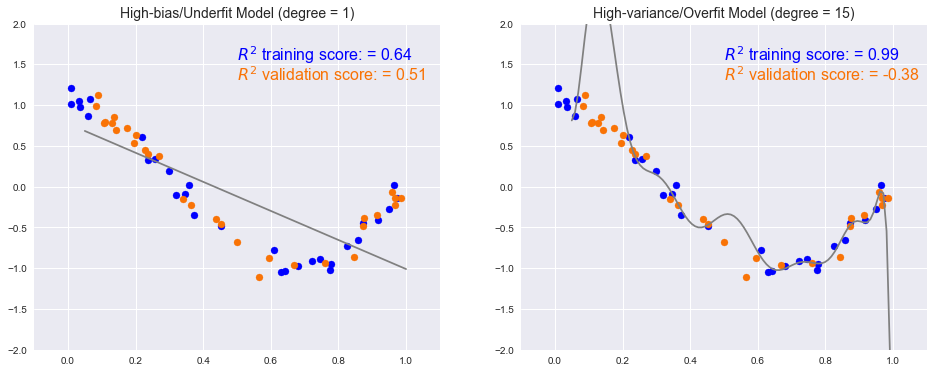

In [51]:
# set up the figure an axes

mpl.style.use('seaborn')
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
#fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
ax0 = ax[0]
ax1 = ax[1]
axis_dims = [-0.1, 1.1, -2.0, 2.0]


# plot an example of an underfit model

ax0.scatter(X_train, y_train, c='blue')
ax0.plot(X_test, model_low_degree_test, color='grey')
ax0.axis(axis_dims)
ax0.set_title('High-bias/Underfit Model (degree = 1)', size=14)
ax0.scatter(X_val, y_val, c='xkcd:orange')
ax0.text(0.5, 1.75, "$R^2$ training score: = {0:.2f}".format(model_low_degree.score(X_train, y_train)),
            verticalalignment='top', size=16, color='blue')
ax0.text(0.5, 1.5, "$R^2$ validation score: = {0:.2f}".format(model_low_degree.score(X_val, y_val)),
           verticalalignment='top', size=16, color='xkcd:orange')


# plot an example of an overfit model

ax1.scatter(X_train, y_train, c='blue')
ax1.plot(X_test, model_high_degree_test, color='grey')
ax1.axis(axis_dims)
ax1.set_title('High-variance/Overfit Model (degree = 15)', size=14)
ax1.scatter(X_val, y_val, c='xkcd:orange')
ax1.text(0.5, 1.75, "$R^2$ training score: = {0:.2f}".format(model_high_degree.score(X_train, y_train)),
            verticalalignment='top', size=16, color='blue')
ax1.text(0.5, 1.5, "$R^2$ validation score: = {0:.2f}".format(model_high_degree.score(X_val, y_val)),
            verticalalignment='top', size=16, color='xkcd:orange');

# Validation Curves
---

Validation curves are tools that compare validation scores across a spectrum of inputs to see how changes to that input change the accuracy of the model.

### Setup code

In [52]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import validation_curve

def Poly_Regression(degree=1, **kwargs):
    '''A pipeline that funnels inputs through a series of algorithms, automagically.
    
    Specifically, feeds input data and parameters into the PolynomialFeatures preprocessor
    and funnels the outputs into the LinearRegression estimator.
    '''
    return make_pipeline(PolynomialFeatures(degree), 
                         LinearRegression(**kwargs))


def true_fun(X):
    '''Simply a function to generate the y-values of the curve used as ground truth.'''
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)
degree = np.arange(0, 12)

### Data sets

In [53]:
# Training Data

x = np.sort(np.random.rand(n_samples))
X = x[:, np.newaxis]
y = true_fun(x) + np.random.randn(n_samples) * 0.1

**NOTE**: In this case, we are gonna rely on the inner workings of the validation curve to parse out the validation data for us.


In [54]:
# Test Data

X_test = np.linspace(0.05, 1, 100)[:, np.newaxis]

### Model creation, training, and prediction

In [55]:
train_score, validation_score = validation_curve(Poly_Regression(),
                                                 X, y, 
                                                 'polynomialfeatures__degree',
                                                 degree,
                                                 cv=7,)

Let's look at the outcome of the validation curve function.

For every degree (in this case ranging from 0 to 12 ) we feed into the Poly_Regression model (which encapsulates a Polynomial Features and Linear Regression pipeline), we get back the accuracy scores for seven cross-validation splits. The accuracy scores are calculated using both the target data and the validation data.

Below are the outcomes for calculations using a degree of 5.

In [56]:
train_score[5], validation_score[5]

(array([0.89612064, 0.9781847 , 0.97853494, 0.9757121 , 0.97877253,
        0.97518014, 0.97639703]),
 array([-1.02239436e+03, -1.37061772e+00, -6.18000715e+00, -4.50444653e-01,
         2.94061065e-01,  7.86735168e-01,  2.59035830e-01]))

### Visualization

If we plot the degrees and the median values derived by the validation curve function (for both the test scores and the validation scores), we see a pair of curves similar to this:

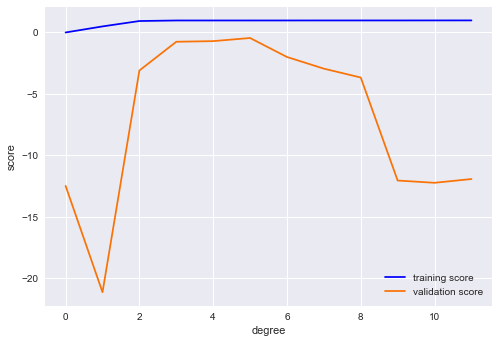

In [57]:
plt.plot(degree, np.median(train_score, axis=1), color='blue', label='training score')
plt.plot(degree, np.median(validation_score, axis=1), color='xkcd:orange', label='validation score')
plt.legend(loc='best')
plt.xlabel('degree')
plt.ylabel('score');

**How do we read this?**

We look for the degree where the two lines have their closest approach.

That input value should produce the most accurate result. Above, we see that a degree of 5 should be our best bet.

**Negative numbers?** What gives?

The values produced by the accuracy scorer can be either negative OR positive, with the primary rule being: bigger is better.

This caused me no end of frustration and confusion when I saw it. And it caused the developers of scikit-learn considerable consternation for three years (between 2013 and 2016), as evidenced by this thread on the scikit-learn github issues tracker:

https://github.com/scikit-learn/scikit-learn/issues/2439

For a high-level treatment, you can also see this Stackoverflow Q & A.

https://stackoverflow.com/questions/21443865/scikit-learn-cross-validation-negative-values-with-mean-squared-error

### Did this really work?

So, how well did that really work in helping us pick a reasonable input for degree in our model?

* We know that a degree of 1 (a straight line) is not accurate.
* We know that a degree of 15 is hyper curvy. 

Let's see what a degree of 5 looks like.

In [58]:
X = x[:, np.newaxis]
X.shape, y.shape

((30, 1), (30,))

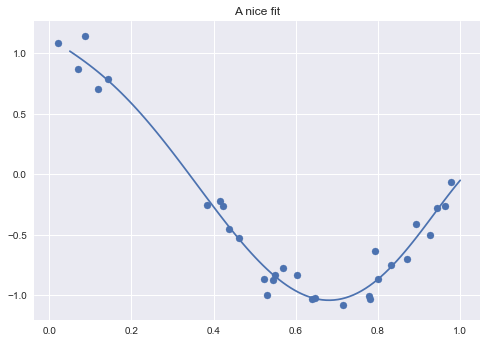

In [59]:
plt.scatter(X, y)
y_test = Poly_Regression(degree=5).fit(X, y).predict(X_test)
plt.plot(X_test, y_test)
plt.title("A nice fit");

# Another example

The scikit-learn documentation is chock-full of good examples and solid explanatory materials. Take advantage of the examples to help explore the various classes, functions and methods.

This is a really nice example of a validation curve used in conjunction with a Support Vector Machine (SVM).

https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py

I have made minor edits to clarify some of the code and to change the color palette slightly.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

X, y = load_digits(return_X_y=True)

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="navy", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                  color="navy", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.legend(loc="best")
plt.show()

# A Yellowbrick example...

For discussion, the Yellowbrick project has spent considerable time and effort in trying to standardize visualizations for a number of popular scikit-learn models. One of the visualization areas they are exploring is the production of validation curves. 

Here are several examples:

https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html

# Test set leakage / Data leakage
---

Before we go too far, a concept to keep in mind, as we seek to fine-tune our models is the issue of data leakage OR test set leakage...

Tweaking models to try and get better results leaks knowledge about the test data back into the model training process.

How? you might ask... 

When you run your model against a test data set and then tweak it (i.e. change a hyper-parameter or a parameter) to achieve a higher level of accuracy when run a second time against that test data set ... you are unwittingly tuning the model to more closely match the test data, i.e. get a better accuracy score against the test data. 

This article discusses this issue to some degree.

https://www.kdnuggets.com/2019/05/careful-looking-model-results-cause-information-leakage.html

# Workshop reminder
---

Join us at the hands-on workshop focused on exploring this topic in greater depth and with code you can explore and experiment with.

http://bit.ly/202003_val_workshop

* March 21, 2020
* Starts at 9:00 am
* Goes for about 3.5 hours
* We'll feed you!
* I'll try to educate and entertain you

Plenty of chances for you to dive into the code and manipulate it yourself so that you can get a better understanding of what is happening under the hood.

Content?

We will cover the material you see here today in greater depth AND we will dive into:
   * Learning curves
   * Grid search
   * Gotchas


# Hackathon reminder
---

Booz Allen is hosting a Hackathon!

**Theme**: Open Source Solutions for Climate Change

**Technical requirements**: You are free to leverage any technologies, frameworks, methodologies, etc., but all solutions produced must be able to be open sourced under the MIT License. To help kickstart your creative juices, we will be providing a number of rich datasets a few weeks before the event (NOTE: their usage is NOT required in your solution)

* Saturday, March 7th, 2020
* Doors will open for check-in starting at 8:00am
* Event officially kicks off at 9:00am and ends at 9:00pm
* Free food throughout the day

https://bit.ly/2FrXgXc

# How to reach me?
---

twitter: @chalmer_lowe

email: info@darkartofcoding.com

linkedin: https://www.linkedin.com/in/chalmerlowe/

github: https://github.com/chalmerlowe


### NOTES TO SELF:

* changing the size of the training set to 195 improves the accuracy to 0.93 ... vs 140 @ 0.842 in holdout attempt 2.
* ID places where val curves are most frequently used...

In [ ]:
# example of manually changing the number OR composition of features...

In [ ]:
X2 = df[['area', 'l', 'w', 'lkg']]    # without the lkg, this evaluates to ~.82, with ~.91
y2 = df['cat']

In [ ]:
# names=['area', 'p', 'c', 'l', 'w', 'ac', 'lkg', 'cat'])

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,
                                                    random_state=142,
                                                    train_size=140) 

In [ ]:
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

In [ ]:
X_train2[:5]

In [ ]:
y_train2[:5]

In [ ]:
model.fit(X_train2, y_train2)

In [ ]:
y_test_model2 = model.predict(X_test2)

In [ ]:
accuracy_score(y_test2, y_test_model2)

# Experience Points!
---

**Task 01**

* Open the API Reference (mentioned above) and find the section on `model_selection.train_test_split`
* Review that section (at a high level) for about 2 minutes looking for the following:
   * Make notes of any words that you aren't familiar with. See if you hear them later in this tutorial
   * Explore the section that describes what type of data the `train_test_split()` function returns. What will you get back?

---
When you complete this exercise, please put your **green** post-it on your monitor. 

If you want to continue on at your own-pace, please feel free to do so.

<img src='../universal_images/green_sticky.300px.png' width='200' style='float:left'>

# References
---

Below are references that may assist you in learning more:
    
|Title (link)|Comments|
|---|---|
|[API Reference](https://scikit-learn.org/stable/modules/classes.html)|One stop shop for the classes and functions in `sklearn`|
|[Contributors API Overview](https://scikit-learn.org/stable/developers/contributing.html#api-overview)|Overview of the API for contributors to scikit learn|
|[API design contract](https://arxiv.org/abs/1309.0238)|An overview of the philosophy behind the API design|
|[Regression Analysis](https://en.wikipedia.org/wiki/Regression_analysis)|An article on regression analysis|
|[Cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis)|An article on cluster analysis|
|[curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)|An article on the curse of dimensionality|